### Value Iteration - Dynamic Programming Until Convergence

#### <u>Start with the Terminal Cost:</u>

You start with a terminal cost function at the final stage $N$:
$$
J_N(x_N) = g_N(x_N)
$$
Here, $J_N(x_N)$ is the cost at the terminal stage, defined by $g_N(x_N)$.

#### <u>Iterate Backwards (Bellman Equation):</u>

For each stage $n$ moving backward from $N-1$ to 0, you calculate the cost-to-go function $J_n(x_n)$ using the Bellman equation:
$$
J_n(x_n) = \min_{u_n} \left( g(x_n, u_n) + J_{n+1}(f(x_n, u_n)) \right)
$$
Here:
- $g(x_n, u_n)$ represents the **instantaneous cost** at time $n$.
- $J_{n+1}(f(x_n, u_n))$ is the **optimal cost-to-go** from stage $n+1$ onward, given that the state will evolve to $f(x_n, u_n)$ after taking action $u_n$.

The **cost-to-go** function $J_n(x_n)$ represents the minimum expected cost starting from stage $n$ and following the optimal policy.

#### <u>Optimal Policy $ \pi^* $:</u>

The optimal policy $ \pi^* $ is the sequence of actions $ \{u_n\} $ that minimizes the overall cost starting from the initial state.

The **optimal value function** $J^*(x_0)$ is given by:
$$
J^*(x_0) = \min_{\mu_0(x_0), \dots, \mu_{N-1}(x_{N-1})} \left\{ g(x_N) + \sum_{k=0}^{N-1} g(x_k, \mu_k(x_k), \omega_k) \right\}
$$
This value function $J^*(x_0)$ represents the minimum possible cost starting from the initial state $x_0$.

---

### <u>Value Iteration Convergence</u>

#### <u>Value Iteration Formula:</u>

For a bounded cost function $J(x)$, the value iteration process is defined by the recursive formula:
$$
J^{n+1}(x) = \min_u \left( g(x, u) + \alpha J^n(f(x, u)) \right)
$$
Here:
- $J^{n+1}(x)$ is the updated cost function after iteration $n+1$.
- $g(x, u)$ is the immediate cost for state $x$ and action $u$.
- $\alpha$ is a discount factor (often $0 < \alpha \leq 1$) that weighs the future cost.

#### <u>Initialization and Convergence:</u>

Initialize $J(x)$ arbitrarily (e.g., $J^0(x)$).

With each iteration, $J(x)$ is updated, and the process continues until it converges to the optimal value function:
$$
\lim_{n \to \infty} J^{n+1}(x) = J^*(x)
$$
This ensures that the value function $J(x)$ approaches the optimal value $J^*(x)$ as the number of iterations grows.

---


Lets see an example. In the given grid:

$$
g_n(x_n) = 
\begin{cases} 
1 & \text{if } x_n \text{ is a red cell} \\
0 & \text{if } x_n \text{ is a white cell} \\
-1 & \text{if } x_n \text{ is a green cell} 
\end{cases}
$$

<div><center>
<img src="./gridexampl.png" width="500"/>
</center></div>

Implement the value iteration algorithm to solve the problem (initialize the value function to 0). How many iterations does it take to attain convergence? (we assume here that convergence happens when
all the elements of the value function do not change more than 10−6 in a new iteration.

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [15]:
#constants
w=0
g=-1
r=1
alp=0.9
i=1

samp=np.zeros(([3,4]),dtype=object)
samp[0,3]=-1
samp[1,3]=1
samp[1,1]='*'
grid_samp=np.zeros(([3,4]),dtype=object)

threshold_matrix=1e-30*np.ones(([3,4]),dtype=float)
threshold_matrix[1,1]=0

In [7]:
all_less_or_equal = False

while not all_less_or_equal:
    i += 1  # Increment iteration counter at the start of the loop

    # Compute grid_samp based on samp
    grid_samp[0,0] = min(w + alp * samp[0,0], w + alp * samp[1,0], w + alp * samp[0,1])
    grid_samp[0,1] = min(w + alp * samp[0,0], w + alp * samp[0,1], w + alp * samp[0,2])
    grid_samp[0,2] = min(w + alp * samp[1,2], w + alp * samp[0,1], w + alp * samp[0,2], w + alp * samp[0,3])
    grid_samp[0,3] = g + alp * samp[0,3]
    grid_samp[1,0] = min(w + alp * samp[0,0], w + alp * samp[1,0], w + alp * samp[2,0])
    grid_samp[1,2] = min(w + alp * samp[0,2], w + alp * samp[1,2], w + alp * samp[2,2], w + alp * samp[1,3])
    grid_samp[1,3] = r + alp * samp[1,3]
    grid_samp[2,0] = min(w + alp * samp[1,0], w + alp * samp[2,0], w + alp * samp[2,1])
    grid_samp[2,1] = min(w + alp * samp[2,0], w + alp * samp[2,1], w + alp * samp[2,2])
    grid_samp[2,2] = min(w + alp * samp[2,1], w + alp * samp[2,2], w + alp * samp[2,3], w + alp * samp[1,2])
    grid_samp[2,3] = min(w + alp * samp[2,2], w + alp * samp[2,3], w + alp * samp[1,3])

    

    # Calculate delta_mat before updating samp
    delta_mat = np.array([
        [abs(grid_samp[0,0] - samp[0,0]), abs(grid_samp[0,1] - samp[0,1]), abs(grid_samp[0,2] - samp[0,2]), abs(grid_samp[0,3] - samp[0,3])],
        [abs(grid_samp[1,0] - samp[1,0]), 0, abs(grid_samp[1,2] - samp[1,2]), abs(grid_samp[1,3] - samp[1,3])],
        [abs(grid_samp[2,0] - samp[2,0]), abs(grid_samp[2,1] - samp[2,1]), abs(grid_samp[2,2] - samp[2,2]), abs(grid_samp[2,3] - samp[2,3])]
    ])

    
    # Update samp after calculating delta_mat
    samp = grid_samp.copy()

    
    # Check convergence
    comparison = delta_mat <= threshold_matrix
    all_less_or_equal = np.all(comparison)

    if all_less_or_equal == True:
       # Round the new grid_samp values
       grid_samp = np.vectorize(lambda x: round(float(x), 2) if isinstance(x, (int, float)) else x)(grid_samp) 
    
    if i > 1100:
        print("Reached maximum iterations without convergence.")
        break

    
print(f"Iteration: {i}")
print(grid_samp)


Iteration: 333
[[ -7.29  -8.1   -9.   -10.  ]
 [ -6.56   0.    -8.1   10.  ]
 [ -5.9   -6.56  -7.29  -6.56]]


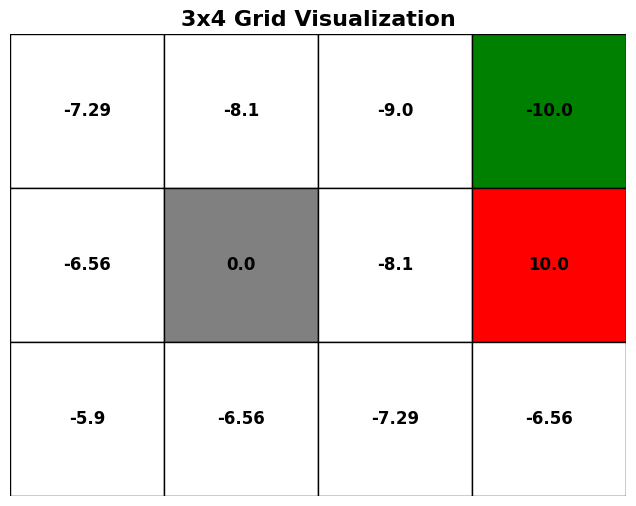

In [8]:
# Identify highest and lowest numeric values
numeric_values = [cell for row in grid_samp for cell in row if isinstance(cell, (int, float))]
highest_value = max(numeric_values)
lowest_value = min(numeric_values)

# Define grid size
rows, cols = grid_samp.shape

# Create a color map based on the rules
def get_cell_color(value):
    if value == 0:
        return 'grey'
    elif value == highest_value:
        return 'red'
    elif value == lowest_value:
        return 'green'
    else:
        return 'white'

# Create the plot
fig, ax = plt.subplots(figsize=(cols * 2, rows * 2))  # Adjust figsize for better visibility

# Draw the grid
for i in range(rows):
    for j in range(cols):
        cell = grid_samp[i, j]
        color = get_cell_color(cell)
        
        # Create a rectangle for each cell
        rect = patches.Rectangle((j, rows - i - 1), 1, 1, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)
        
        # Add text annotation
        ax.text(j + 0.5, rows - i - 0.5, str(cell), 
                horizontalalignment='center', verticalalignment='center', 
                fontsize=12, fontweight='bold')

# Set the limits and aspect
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_aspect('equal')

# Add grid lines for better visualization
ax.set_xticks(np.arange(0, cols + 1, 1))
ax.set_yticks(np.arange(0, rows + 1, 1))
ax.grid(which='both', color='black', linewidth=1)

# Remove axes labels
ax.axis('off')

# Add a title
plt.title('3x4 Grid Visualization', fontsize=16, fontweight='bold')

# Display the plot
plt.show()